In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import argparse
import pickle
import os
import tensorflow as tf
import numpy as np

from pathlib import Path
from sklearn.model_selection import train_test_split

from m_package.models.Conv_LSTM_grad import build, ConvLSTM
from m_package.common.utils import plot_history

import warnings
warnings.simplefilter('always')

In [27]:
path = Path("Datasets")

with open(os.path.join(path, 'X_huddled.txt'),'rb') as f:
    X_data = pickle.load(f)
with open(os.path.join(path, 'y_huddled.txt'),'rb') as f:
        y_data = pickle.load(f)
size = [20, 32, 64]
print("_huddled dataset has been loaded")

_huddled dataset has been loaded


In [6]:
path = Path("Datasets")

with open(os.path.join(path, 'X_traj.txt'),'rb') as f:
    X_data = pickle.load(f)
with open(os.path.join(path, 'y_traj.txt'),'rb') as f:
    y_data = pickle.load(f)
size = [20, 16, 64]

In [28]:
X_data.shape

(4764, 20, 32, 64)

In [29]:
batch_size = 16

X_train, X_valt, y_train, y_valt = train_test_split(X_data, y_data, test_size=0.35, stratify=y_data)
X_val, X_test, y_val, y_test = train_test_split(X_valt, y_valt, test_size=0.5, stratify=y_valt)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)

In [9]:
final_results = {
    "auc_roc" : [],
    "accuracy" : [],
    "precision": [],
    "recall": [],
    "f1": []
}

In [125]:
for k in range(1):

    X_train, X_valt, y_train, y_valt = train_test_split(X, y, test_size=0.35, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_valt, y_valt, test_size=0.5, stratify=y_valt)

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)

    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
    
    model = build('relu', [20, 16, 64])

    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    train_metric = tf.keras.metrics.AUC(name='auc', multi_label=True)
    val_metric = tf.keras.metrics.AUC(name='auc', multi_label=True)

    conv_model = ConvLSTM(model, optimizer, loss_fn, train_metric, val_metric)
    conv_model.fit(2, train_dataset, val_dataset)

    model_ret = conv_model.ret()
    metrics_per_fold(model_ret, test_dataset, final_results)
    print(final_results)

res = counting(final_results)
print(res)


Start of epoch 0


2023-11-05 12:12:59.132176: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [3096,20,16,64]
	 [[{{node Placeholder/_0}}]]
2023-11-05 12:12:59.132766: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]


Tensor("categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Training AUC over an epoch: 0.5304
Training average loss over an epoch: 1.3622


2023-11-05 12:17:58.255781: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]


Validation AUC: 0.5556

Start of epoch 1
Training AUC over an epoch: 0.5653
Training average loss over an epoch: 1.2743
Validation AUC: 0.5738


2023-11-05 12:23:28.644071: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mar

{'auc_roc': [0.5373], 'accuracy': [0.3077], 'precision': [0.1103], 'recall': [0.3077], 'f1': [0.1586]}
auc_roc:
0.5373 \pm 0.0
accuracy:
0.3077 \pm 0.0
precision:
0.1103 \pm 0.0
recall:
0.3077 \pm 0.0
f1:
0.1586 \pm 0.0
{'auc_roc': '0.5373 pm 0.0', 'accuracy': '0.3077 pm 0.0', 'precision': '0.1103 pm 0.0', 'recall': '0.3077 pm 0.0', 'f1': '0.1586 pm 0.0'}


/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Разобраться что происходит с метриками

почему acc совпадает с recall

## Metrics

In [6]:
#dataset creation
batch_size = 16
X_train, X_valt, y_train, y_valt = train_test_split(X, y, test_size=0.35, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_valt, y_valt, test_size=0.5, stratify=y_valt)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)

In [12]:
# model building
model = build('relu', [20, 16, 64])

optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

train_metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)
val_metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)

conv_model = ConvLSTM(model, optimizer, loss_fn, train_metric, val_metric)
conv_model.fit(2, train_dataset, val_dataset)


Start of epoch 0


2023-11-05 14:10:12.871114: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]
2023-11-05 14:10:12.871561: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]


Training AUC over an epoch: 0.5225
Training average loss over an epoch: 1.4191


2023-11-05 14:14:59.977504: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]


Validation AUC: 0.5933

Start of epoch 1
Training AUC over an epoch: 0.5587
Training average loss over an epoch: 1.2825
Validation AUC: 0.6149
[1.41914701461792, 1.2824620008468628] LOSSES
[0.5224553, 0.5586681] TRAIN AUC
[0.5932565, 0.61493134] VALID


нужны: auc_roc, accuracy, precision, recall, f1

In [15]:
# return the trained model
model = conv_model.ret()

## FULL METRIC CALC

In [4]:
from m_package.common.metrics import metrics_per_fold, resulting
from m_package.common.metrics_tr import metrics_per_fold_tr, counting

/Users/mariakrylova/Documents/ZaVod/new_datasets_package/m_package/common/metrics_tr.py:55: DeprecationWarning: invalid escape sequence \p
  print(f"{mean_} \pm {std_}")


In [8]:
metrics_results = {
    "auc_roc" : [],
    "accuracy" : [],
    "precision": [],
    "recall": [],
    "f1": []
}

metrics_results_tr = {
    "auc_roc" : [],
    "accuracy" : [],
    "precision": [],
    "recall": [],
    "f1": []
}

In [9]:
for k in range(2):
    # dataset creation
    X_train, X_valt, y_train, y_valt = train_test_split(X, y, test_size=0.35, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_valt, y_valt, test_size=0.5, stratify=y_valt)

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)

    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
    
    # model building
    model = build('relu', [20, 16, 64])

    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    train_metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)
    val_metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)

    conv_model = ConvLSTM(model, optimizer, loss_fn, train_metric, val_metric)
    conv_model.fit(2, train_dataset, val_dataset)

    model_ret = conv_model.ret()

    # calc metrics 
    metrics_results = metrics_per_fold(model_ret, test_dataset, metrics_results) # on full test set
    metrics_results_tr = metrics_per_fold_tr(model_ret, test_dataset, metrics_results_tr) #calc by batch

final_results = resulting(metrics_results)
final_results_tr = counting(metrics_results_tr)


Start of epoch 0


2023-11-06 11:42:37.205047: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]
2023-11-06 11:42:37.205837: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]


Training AUC over an epoch: 0.5141
Training average loss over an epoch: 1.5306


2023-11-06 11:47:20.499008: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]


Validation AUC: 0.5520

Start of epoch 1
Training AUC over an epoch: 0.5407
Training average loss over an epoch: 1.2918
Validation AUC: 0.5876


2023-11-06 11:52:43.898029: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mar


Start of epoch 0


2023-11-06 11:53:38.198437: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]
2023-11-06 11:53:38.198852: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]


Training AUC over an epoch: 0.5191
Training average loss over an epoch: 1.4758


2023-11-06 11:58:36.575595: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]


Validation AUC: 0.5697

Start of epoch 1
Training AUC over an epoch: 0.5438
Training average loss over an epoch: 1.2960
Validation AUC: 0.5830


2023-11-06 12:04:11.296809: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mar

auc_roc:
0.5751 \pm 0.0177
accuracy:
0.3071 \pm 0.0006
precision:
0.1072 \pm 0.0037
recall:
0.3071 \pm 0.0006
f1:
0.156 \pm 0.0035


/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from m_package.common.utils import saving_results

In [15]:
saving_results(final_results, "final_results")

In [10]:
final_results

{'auc_roc': '0.5827 pm 0.0029',
 'accuracy': '0.3071 pm 0.0006',
 'precision': '0.0943 pm 0.0004',
 'recall': '0.3071 pm 0.0006',
 'f1': '0.1443 pm 0.0005'}

In [11]:
final_results_tr

{'auc_roc': '0.5751 pm 0.0177',
 'accuracy': '0.3071 pm 0.0006',
 'precision': '0.1072 pm 0.0037',
 'recall': '0.3071 pm 0.0006',
 'f1': '0.156 pm 0.0035'}

## NEED TO PRINT ONLY AVERAGE LOSS

In [9]:
from m_package.common.utils import plot_history, plot_loss, save_model

In [6]:
batch_size = 16
X_train, X_valt, y_train, y_valt = train_test_split(X, y, test_size=0.35, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_valt, y_valt, test_size=0.5, stratify=y_valt)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)

In [7]:
model = build('relu', [20, 16, 64])

optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

train_metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)
val_metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)

conv_model = ConvLSTM(model, optimizer, loss_fn, train_metric, val_metric)
conv_model.fit(2, train_dataset, val_dataset)


Start of epoch 0


2023-11-06 12:45:29.795441: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]
2023-11-06 12:45:29.795616: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3096,3]
	 [[{{node Placeholder/_1}}]]


Training AUC over an epoch: 0.5192
Training average loss over an epoch: 1.5824


2023-11-06 12:50:38.160686: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [834,3]
	 [[{{node Placeholder/_1}}]]


Validation AUC: 0.5892

Start of epoch 1
Training AUC over an epoch: 0.5524
Training average loss over an epoch: 1.2689
Validation AUC: 0.5808


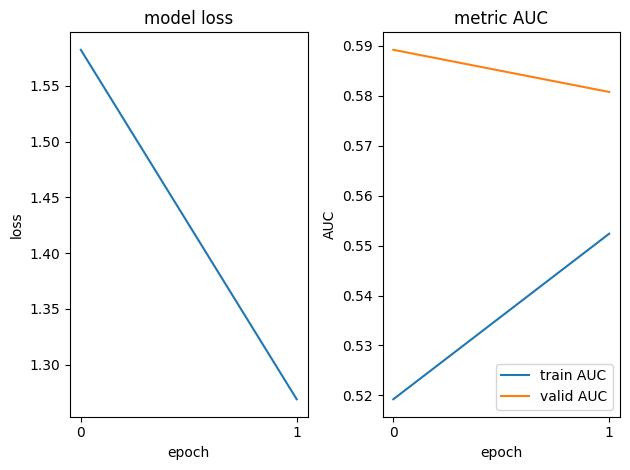

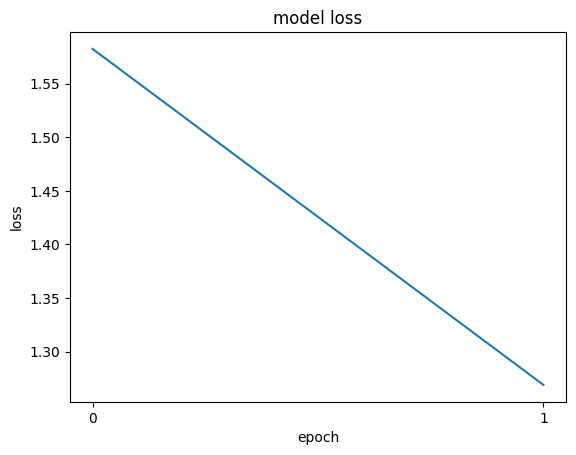

In [12]:
loss = conv_model.loss_per_training
valid_auc_ = conv_model.valid_auc
train_auc_ = conv_model.training_auc

path = "Figures"
name = str(2) + "_test"

plot_history(loss, valid_auc_, train_auc_, path, name)
plot_loss(loss, path, name)

In [10]:
name = str(2) + "_test" 
save_model(conv_model.ret(), name)

Осталось: создать by_size dataset; протестировать main

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("Fixation_cutted_frames.csv")
data.shape

(167488, 7)

In [14]:
from m_package.data.creartion import DyslexiaVizualization

In [ ]:
"by_size"

In [15]:
smth = DyslexiaVizualization([32, 64], dataset_name="Fixation_cutted_frames.csv", path="Datasets", file_format="csv")

In [16]:
X_s, y_s = smth.get_datas("huddle")

/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mariakrylova/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for mor

In [17]:
X_s.shape

(4764, 20, 32, 64)

In [18]:
y_s.shape

(4764, 3)

In [19]:
batch_size = 16

X_train, X_valt, y_train, y_valt = train_test_split(X_s, y_s, test_size=0.35, stratify=y_s)
X_val, X_test, y_val, y_test = train_test_split(X_valt, y_valt, test_size=0.5, stratify=y_valt)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)

In [21]:
with open('y_huddled.txt','wb') as f:
    pickle.dump(y_s, f)

In [ ]:
X_by_size.txt

In [32]:
y_s[4050]

array([0., 0., 1.], dtype=float32)

In [22]:
import skimage.io

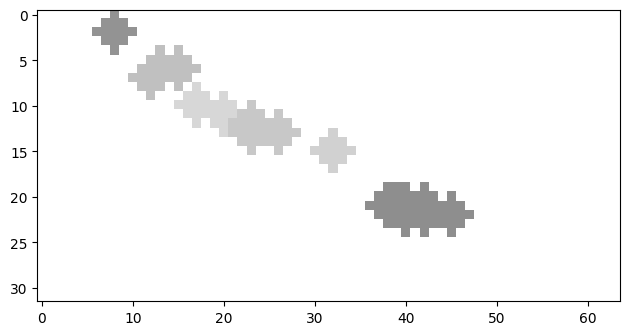

In [24]:
skimage.io.imshow(X_s[0][19])

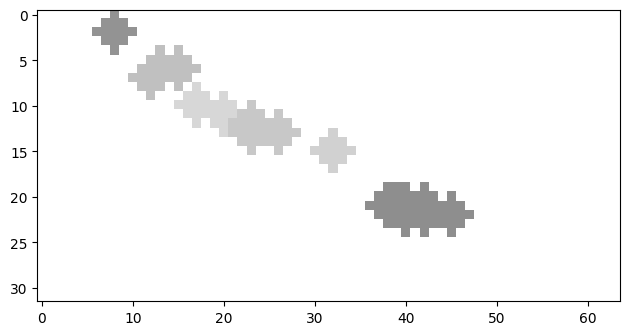

In [51]:
skimage.io.imshow(X[0][19])